<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/GJW_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# Import tools for this project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# read index of dataset
pd.read_csv('/content/Index')

,Index of voting-records
0,02 Dec 1996 135 Index
1,30 Jun 1993 6868 house-votes-84.names
2,30 May 1989 18171 house-votes-84.data


In [0]:
# assign data to a dataframe
# use header argument to avoid losing a row in the 
# missing column row of uploaded file
df = pd.read_csv('/content/house-votes-84.data', header=None)

In [32]:
# get the shape of dataframe(rows, columns)
df.shape

(435, 17)

In [33]:
# print first two rows of data
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?


In [34]:
# replace the abstain with NaN
df = df.replace('?', np.NaN)
# replace n with 0
df = df.replace('n', 0)
# replace y with 1
df = df.replace('y', 1)
# print first two rows of data to verify changes
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN


In [0]:
# rename the features/columns into meaningful titles
df.rename(columns={0:'party', 1:'handicapped_infants', 2:'water_project_cost_sharing', 
           3:'adoption_of_the_budget_resolution', 4:'physician_fee_freeze', 
           5:'el_salvador_aid', 6:'religious_groups_in_schools', 7:'anti_satellite_test_ban',
           8:'aid_to_nicaraguan_contras', 9:'mx_missle', 10:'immigration',
           11:'synfuels_corporation_cutback', 12:'education_spending', 13:'superfund_right_to_sue',
           14:'crime', 15:'duty_free_exports', 16:'export_administration_act_south_africa'}, inplace=True)

In [0]:
# split into two separate data frames
# one for repub, one for dem
dem = ['democrat']
repub = ['republican']
df_dem = df[df['party'].isin(dem)]
df_repub = df[df['party'].isin(repub)]

In [37]:
# print first two rows of data to verify column name changes
df_dem.shape

(267, 17)

In [38]:
# print first row of dem dataframe
df_dem.head(1)

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [39]:
# print first row of repub datafram
df_repub.head(1)

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missle,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0


In [40]:
for col in df_repub:
  print(pd.crosstab(index=1, columns=df_repub[col]))

party  republican
row_0            
1             168
handicapped_infants  0.0  1.0
row_0                        
1                    134   31
water_project_cost_sharing  0.0  1.0
row_0                               
1                            73   75
adoption_of_the_budget_resolution  0.0  1.0
row_0                                      
1                                  142   22
physician_fee_freeze  0.0  1.0
row_0                         
1                       2  163
el_salvador_aid  0.0  1.0
row_0                    
1                  8  157
religious_groups_in_schools  0.0  1.0
row_0                                
1                             17  149
anti_satellite_test_ban  0.0  1.0
row_0                            
1                        123   39
aid_to_nicaraguan_contras  0.0  1.0
row_0                              
1                          133   24
mx_missle  0.0  1.0
row_0              
1          146   19
immigration  0.0  1.0
row_0                
1             

In [41]:
for col in df_dem:
  print(pd.crosstab(index=1, columns=df_dem[col]))

party  democrat
row_0          
1           267
handicapped_infants  0.0  1.0
row_0                        
1                    102  156
water_project_cost_sharing  0.0  1.0
row_0                               
1                           119  120
adoption_of_the_budget_resolution  0.0  1.0
row_0                                      
1                                   29  231
physician_fee_freeze  0.0  1.0
row_0                         
1                     245   14
el_salvador_aid  0.0  1.0
row_0                    
1                200   55
religious_groups_in_schools  0.0  1.0
row_0                                
1                            135  123
anti_satellite_test_ban  0.0  1.0
row_0                            
1                         59  200
aid_to_nicaraguan_contras  0.0  1.0
row_0                              
1                           45  218
mx_missle  0.0  1.0
row_0              
1           60  188
immigration  0.0  1.0
row_0                
1            139  12

In [42]:
df_repub['crime'].mean()

0.9813664596273292

In [0]:
from scipy.stats import ttest_ind

In [44]:
col = ['crime']

ttest_ind(df_repub[col], df_dem[col], nan_policy='omit')

Ttest_indResult(statistic=masked_array(data=[16.342085656197696],
             mask=[False],
       fill_value=1e+20), pvalue=masked_array(data=9.95234271e-47,
             mask=False,
       fill_value=1e+20))

In [0]:
df_repub = df_repub.drop(columns=['party'])
df_dems = df_dem.drop(columns=['party'])

In [0]:
from scipy import stats 

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = data[~np.isnan(data)]
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval);

In [0]:
# data = np.array(df['crime'])
# experimental stuff
  
#  a,b,c = zip(*[confidence_interval() for i in range(10)])
#  plt.plot(mean, mean - interval, mean + interval);
#  plt.show()

In [0]:
## confidence_interval(df_repub['crime'], confidence=0.95)

mean = []
mean_minus = []
mean_plus = []

column = ['crime']

for col in df_dems:
  triplemean = confidence_interval(df_dems[col], confidence=0.95)
  mean.append(triplemean[0])
  mean_minus.append(triplemean[1])
  mean_plus.append(triplemean[2])
 
  
  

In [53]:
print('means of all topics', ':', mean)
print('mean minus interval of all topics', ':',mean_minus)
print('mean plus interval of all topics',':',mean_plus)

means of all topics : [0.6046511627906976, 0.502092050209205, 0.8884615384615384, 0.05405405405405406, 0.21568627450980393, 0.47674418604651164, 0.7722007722007722, 0.8288973384030418, 0.7580645161290323, 0.4714828897338403, 0.5058823529411764, 0.14457831325301204, 0.2896825396825397, 0.35019455252918286, 0.6374501992031872, 0.9351351351351351]
mean minus interval of all topics : [0.5445926997425515, 0.43824514095228484, 0.8499435153340716, 0.02633186149720885, 0.1648631139997972, 0.41539182663748236, 0.7207820216365644, 0.7830845214499412, 0.7043940111605527, 0.41075744059137587, 0.4441027014712158, 0.10059494022327561, 0.23329310265193048, 0.2914817910969736, 0.5775687099725446, 0.8993133658858402]
mean plus interval of all topics : [0.6647096258388437, 0.5659389594661252, 0.9269795615890052, 0.08177624661089927, 0.26650943501981067, 0.5380965454555409, 0.8236195227649801, 0.8747101553561424, 0.8117350210975118, 0.5322083388763047, 0.5676620044111371, 0.18856168628274847, 0.346071976

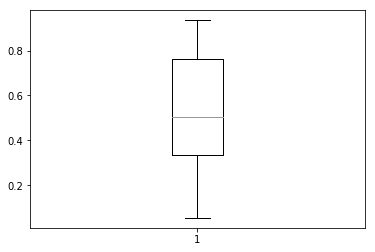

In [58]:
plt.boxplot(mean)
#plt.boxplot(mean_minus)
#plt.boxplot(mean_plus)
plt.show()

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)